In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.shape

(1025, 14)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']], df['target'], test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [7]:
model=LogisticRegression(solver='liblinear',C=10,random_state=0)
model.fit(x_train,y_train)
p_pred=model.predict_proba(x_test)
y_pred=model.predict(x_test)
conf=confusion_matrix(y_test,y_pred)
print(conf)

[[119  40]
 [ 20 129]]


In [8]:
def score(i):
    model.fit(x_train[x_train.columns[i]].values.reshape(-1, 1),y_train)
    p_pred=model.predict_proba(x_test[x_test.columns[i]].values.reshape(-1, 1))
    y_pred=model.predict(x_test[x_test.columns[i]].values.reshape(-1, 1))
    conf=confusion_matrix(y_test,y_pred)
    score=model.score(x_test[x_test.columns[i]].values.reshape(-1, 1),y_test)
    #print(classification_report(y_test, y_pred))
    return score
    

[0.6006493506493507, 0.6396103896103896, 0.7564935064935064, 0.5584415584415584, 0.5097402597402597, 0.4967532467532468, 0.5811688311688312, 0.6915584415584416, 0.7402597402597403, 0.6461038961038961, 0.6818181818181818, 0.7207792207792207, 0.7012987012987013]





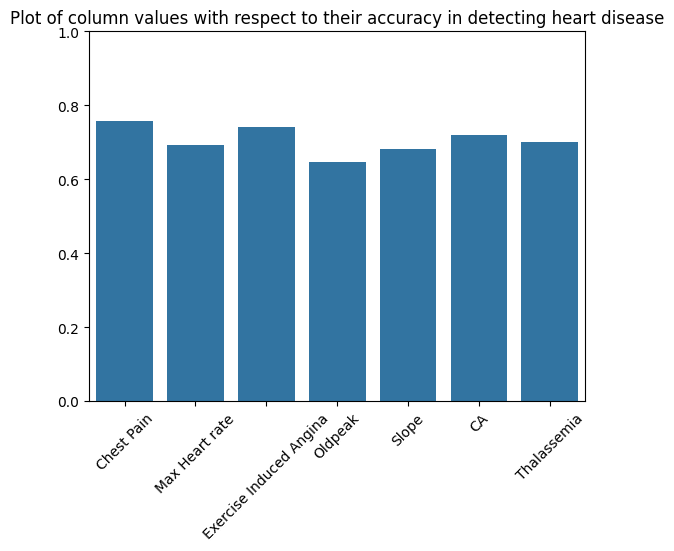

In [9]:
l=[]
cols=[]
col_score=[]
for k in range(0,13):
    l.append(score(k))
print(l)
indices=[]
for i in l:
    if i > 0.64:
        indices.append(l.index(i))
print('\n\n')
for j in indices:
    cols.append((x_test.columns[j]))
    col_score.append(l[j])
plt.plot()
plt.title('Plot of column values with respect to their accuracy in detecting heart disease')
sns.barplot(x=cols,y=col_score)
plt.xticks(ticks=range(len(cols)), labels=['Chest Pain', 'Max Heart rate', 'Exercise Induced Angina', 'Oldpeak','Slope','CA','Thalassemia'], rotation=45)
plt.ylim(0,1)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


     Feature  Importance
2         cp    0.132274
7    thalach    0.125039
11        ca    0.122912
9    oldpeak    0.122852
12      thal    0.113005
0        age    0.085554
4       chol    0.079872
3   trestbps    0.068356
10     slope    0.051335
8      exang    0.042210
1        sex    0.028721
6    restecg    0.018155
5        fbs    0.009714


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

Confusion Matrix:
[[159   0]
 [  9 140]]


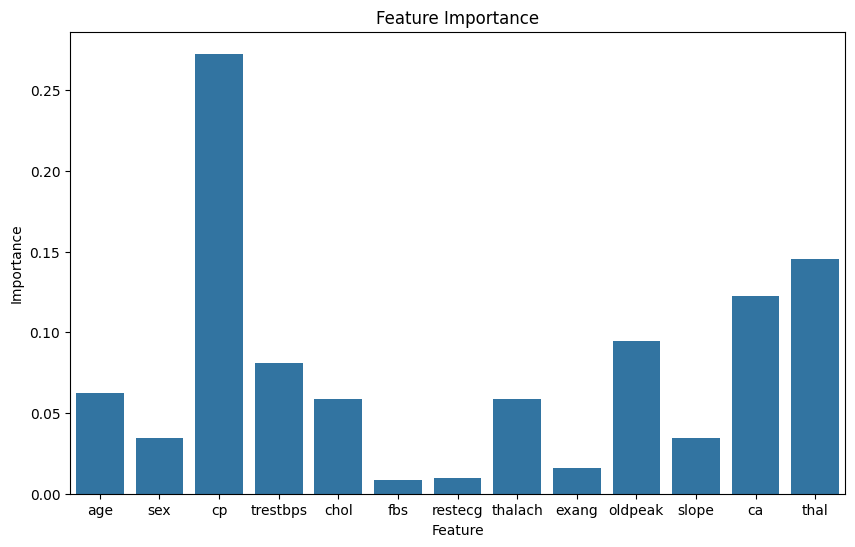

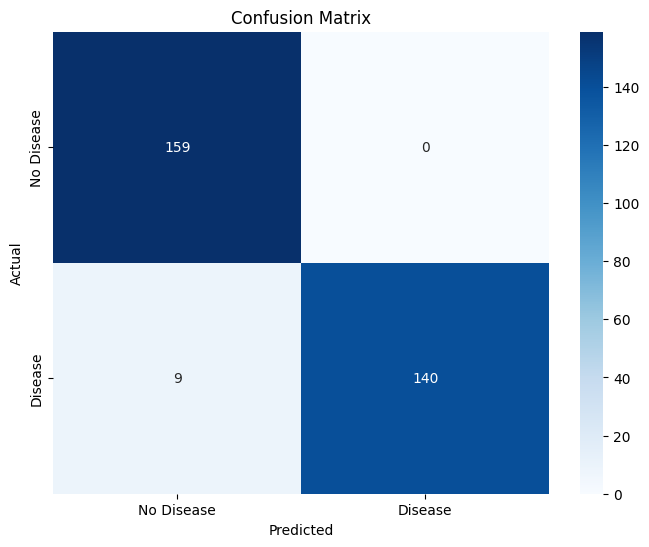

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

importances = clf.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


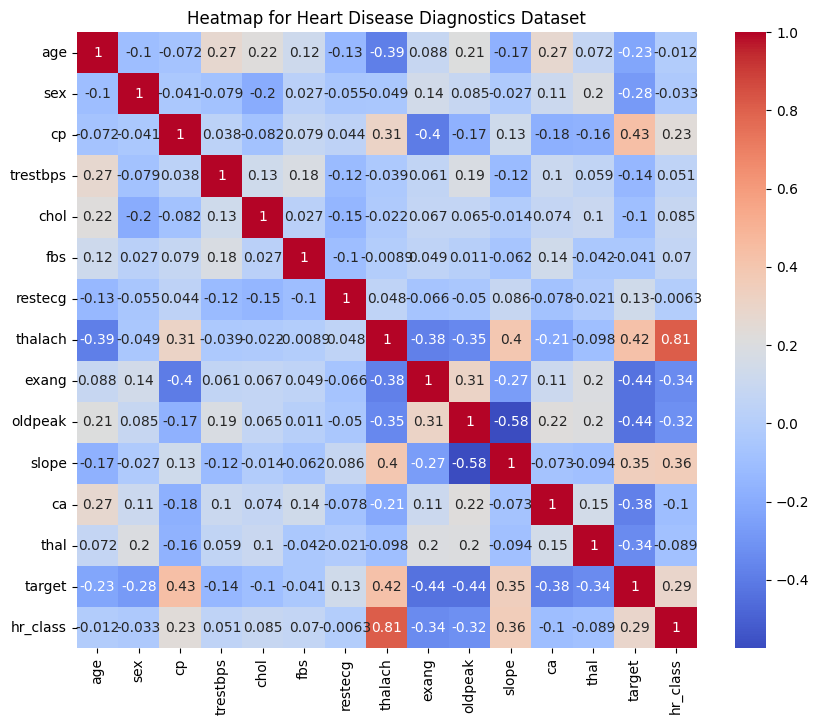

In [17]:
plt.figure(figsize=(10, 8))
plt.title('Heatmap for Heart Disease Diagnostics Dataset')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5328\354483754.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oldpeak_summary = oldpeak.groupby('oldpeak').agg({'sum': 'sum', 'count': 'sum'})


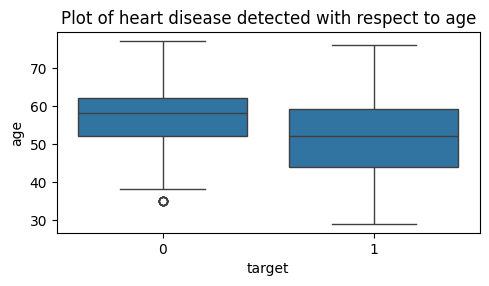

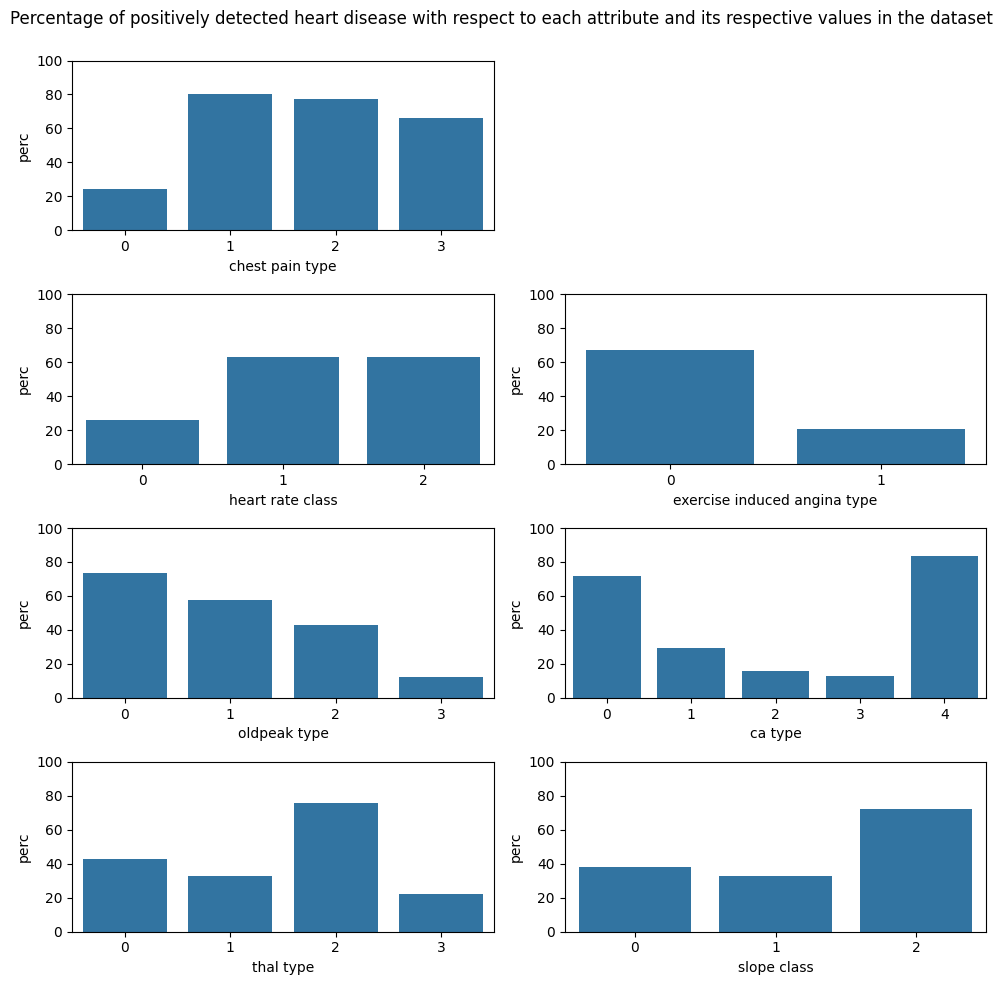

In [15]:
plt.figure(figsize=(12, 12))
plt.subplot(4,2,1)
plt.title('Plot of heart disease detected with respect to age')
sns.boxplot(x='target', y='age', data=df)

cp=df.groupby('cp')['target'].agg(['sum','count'])
cp['perc']=(cp['sum']/cp['count'])*100
plt.figure(figsize=(10, 10))
plt.subplot(4,2,1)
plt.xlabel('chest pain type')
plt.ylim(0,100)
sns.barplot(x=list(cp.index),y=cp.perc)


conditions = [
    df['thalach'] < 0.85 * (220 - df['age']),
    (df['thalach'] >= 0.85 * (220 - df['age'])) & (df['thalach'] <= 220 - df['age']),
    df['thalach'] > 220 - df['age']
]
df['hr_class'] = np.select(conditions, [1,2,3])
heart_rate = df.groupby('hr_class')['target'].agg(['sum', 'count']).reset_index()
heart_rate['perc'] = (heart_rate['sum'] / heart_rate['count']) * 100
heart_rate
plt.subplot(4,2,3)
plt.xlabel('heart rate class')
plt.ylim(0,100)
sns.barplot(x=list(heart_rate.index),y=heart_rate.perc)


exang=df.groupby('exang')['target'].agg(['sum','count'])
exang=exang.reset_index()
exang['perc']=(exang['sum']/exang['count'])*100
plt.subplot(4,2,4)
plt.ylim(0,100)
plt.xlabel('exercise induced angina type')
sns.barplot(x=list(exang.index),y=exang.perc)


oldpeak = df.groupby('oldpeak')['target'].agg(['sum', 'count']).reset_index()
oldpeak['oldpeak'] = pd.cut(
    oldpeak['oldpeak'],
    bins=[-float('inf'), 0, 1, 2, float('inf')],
    labels=[0, 1, 2, 3],
    include_lowest=True
)
oldpeak_summary = oldpeak.groupby('oldpeak').agg({'sum': 'sum', 'count': 'sum'})
oldpeak_summary['perc'] = (oldpeak_summary['sum'] / oldpeak_summary['count']) * 100
plt.subplot(4,2,5)
plt.xlabel('oldpeak type')
plt.ylim(0,100)
sns.barplot(x=list(oldpeak_summary.index),y=oldpeak_summary.perc)


ca=df.groupby('ca')['target'].agg(['sum','count'])
ca=ca.reset_index()
ca['perc']=(ca['sum']/ca['count'])*100
plt.subplot(4,2,6)
plt.xlabel('ca type')
plt.ylim(0,100)
sns.barplot(x=list(ca.index),y=ca.perc)


thal=df.groupby('thal')['target'].agg(['sum','count'])
thal=thal.reset_index()
thal['perc']=(thal['sum']/thal['count'])*100
plt.subplot(4,2,7)
plt.xlabel('thal type')
plt.ylim(0,100)
sns.barplot(x=list(thal.index),y=thal.perc)


slope=df.groupby('slope')['target'].agg(['sum','count'])
slope=slope.reset_index()
slope['perc']=(slope['sum']/slope['count'])*100
plt.subplot(4,2,8)
plt.xlabel('slope class')
plt.ylim(0,100)
sns.barplot(x=list(slope.index),y=slope.perc)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.suptitle('Percentage of positively detected heart disease with respect to each attribute and its respective values in the dataset')
plt.show()